In [1]:
%load_ext autoreload
%autoreload 2
from importlib import reload
import main
import matplotlib.pyplot as plt
import nn
reload(main)
from main import *

(0.0, 80.0)

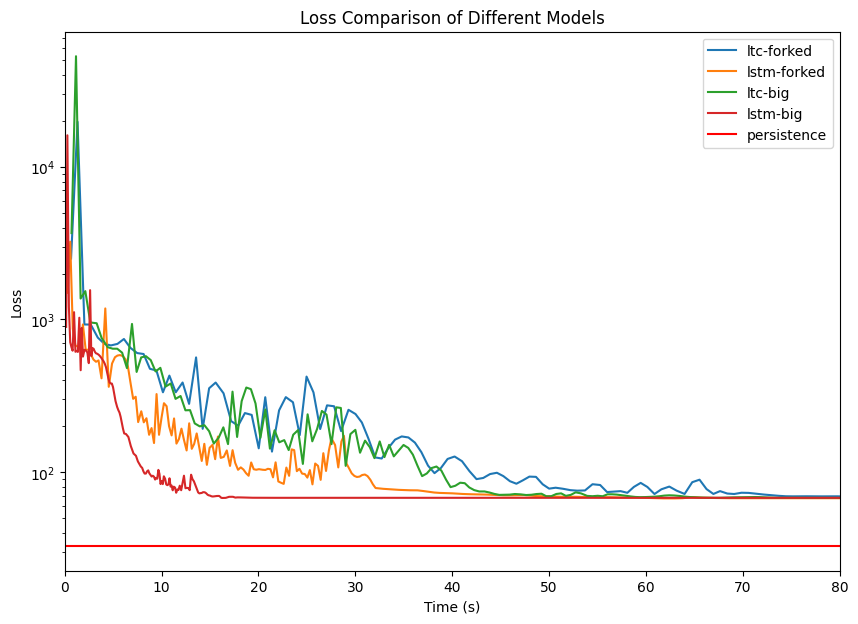

In [129]:
plt.figure(figsize=(10, 7))

#for data in ModelData.load_all():
#    #if data.constructor == 'ltc' and not data.big and data.sparsity == 0.6:
#    if len(data.get_var('val_loss')) > 300:
#    #if True:
#        loss = data.get_var('val_loss')
#        time = data.get_var('time')
#        plt.plot(time, loss, label=data.autoname(detail=True))

# ltc-(forked)-good: huquez_bothoth
# lstm-(forked)-bad: quophong_foyuth
# ltc-(big)-bad: futhug_whader
# lstm-(big)-bad: muces_kowhah
for name in 'huquez_bothoth quophong_foyuth futhug_whader muces_kowhah'.split():
    data = ModelData.load(name)
    loss = data.get_var('val_loss')
    time = data.get_var('time')
    plt.plot(time, loss, label=data.autoname())
    #plt.plot(loss, label=data.autoname())

plt.axhline(y=data.base_data.val_loss, color='r', linestyle='-', label='persistence')
#plt.axhline(y=67, color='b', linestyle='-', label='asymptotic loss')
plt.legend()
plt.yscale('log')
plt.title('Loss Comparison of Different Models')
plt.xlabel('Time (s)')
plt.ylabel('Loss')
#plt.xlim(0, 200)
plt.xlim(0, 80)

Text(0, 0.5, 'Loss')

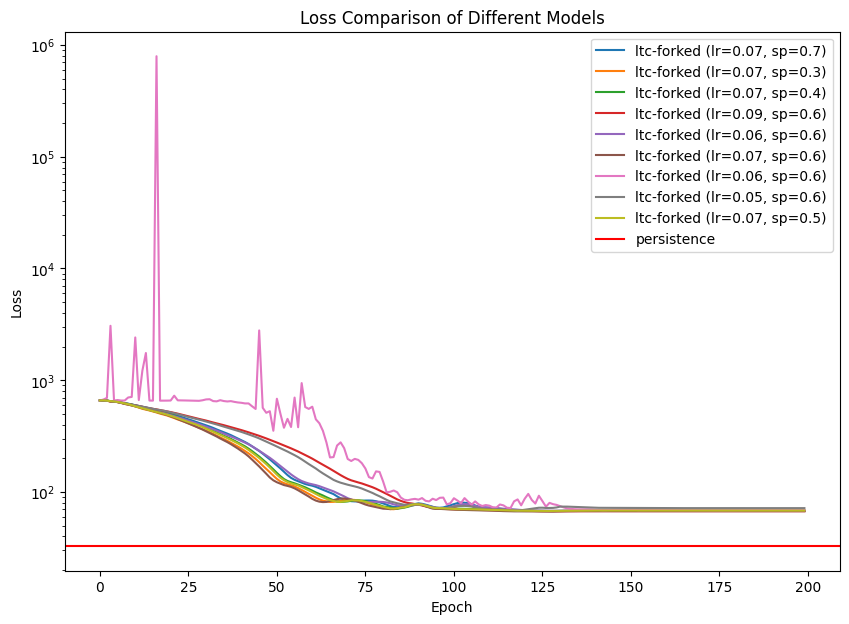

In [114]:
plt.figure(figsize=(10, 7))

for data in ModelData.load_all():
    if data.constructor == 'ltc' and not data.big:
    #if True:
        loss = data.get_var('val_loss')
        plt.plot(loss, label=data.autoname(detail=True))

plt.axhline(y=data1.base_data.val_loss, color='r', linestyle='-', label='persistence')
plt.legend()
plt.yscale('log')
plt.title('Loss Comparison of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')

(400500,
 667226,
 400500,
 400500,
 475572,
 667226,
 475572,
 667226,
 475572,
 400500,
 400500,
 400500,
 400500,
 400500,
 400500)

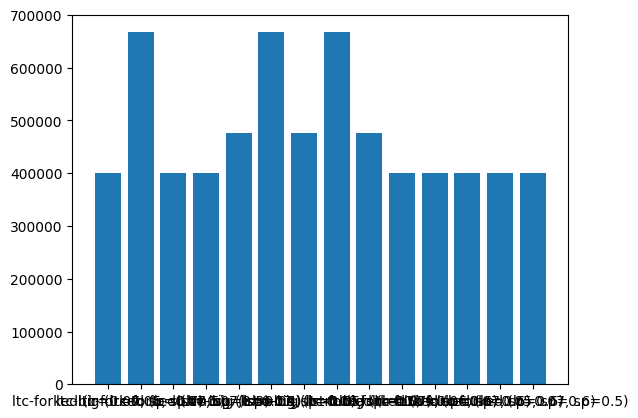

In [116]:
_datas = [(data.autoname(detail=True), sum(x.numel() for x in data.model.parameters() if x.requires_grad)) for data in ModelData.load_all()]
labels, datas = zip(*_datas)
plt.bar(labels, datas)
datas

In [107]:
# itekin_quphoci shater_bichod
# ltc-(forked)-good: huquez_bothoth
# lstm-(forked)-bad: quophong_foyuth
# ltc-(big)-bad: futhug_whader
# lstm-(big)-bad: muces_kowhah
test_model_data = ModelData.load('muces_kowhah')
test_data = nn.random_slice_fast()
#fresh = nn.WeatherPredictor()

torch.Size([22])
torch.Size([22])


tensor(1.4564)

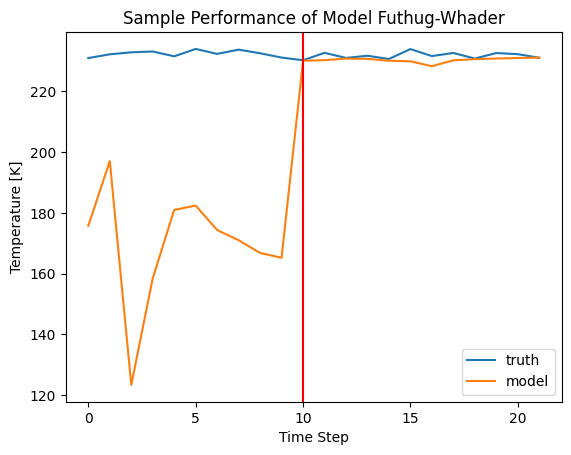

In [108]:
inp_data = test_data[:nn.TIME_LENGTH]
test_model_data.model.eval()
points = test_model_data.model(inp_data).reshape((22, 4, 17))[:,0,0].detach()
#fresh_points = fresh(inp_data).reshape((22, 4, 17))[:,0,0].detach()
true_points = test_data[:,0,nn.GLOBAL_TILE,nn.GLOBAL_TILE,0]
print(points.shape)
print(true_points.shape)
plt.plot(true_points, label='truth')
plt.plot(points, label='model')
#plt.plot(fresh_points, label='fresh')
plt.legend()
plt.axvline(x=nn.TIME_LENGTH, color='r')
plt.title('Sample Performance of Model Futhug-Whader')
plt.xlabel('Time Step')
plt.ylabel('Temperature [K]')
torch.nn.functional.l1_loss(points[nn.TIME_LENGTH:], true_points[nn.TIME_LENGTH:])

In [19]:
anom_sel = nn._anom_sel

In [25]:
nn._anom_sel = torch.zeros_like(nn._anom_sel)
nn._anom_sel = anom_sel
nn._anom_sel.norm()

tensor(19055.3633)

In [121]:
len(data.get_var('variance'))

193